In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/p/s7/mLLabsheet/College/Lab 4/datasets_52721_99691_student-mat.csv')

In [9]:
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

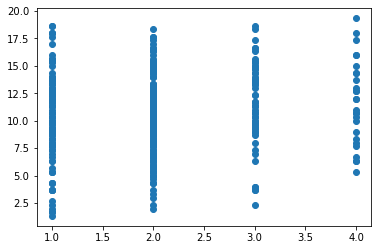

In [11]:
X = np.array(df["studytime"])
Y = np.array((df["G1"]+df["G2"]+df["G3"])/3)
plt.scatter(X,Y)
plt.show()


In [19]:
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size=0.30)

In [20]:


X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

y_train=StandardScaler().fit_transform(y_train)
y_test=StandardScaler().fit_transform(y_test)


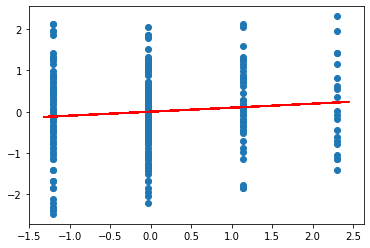

In [21]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


plt.scatter(X_train, y_train)
plt.plot(X_test,y_pred, color="red")

In [22]:
def gradient_descent(alpha, x, y, max_iter=50): 
    theta = 0
    m = np.size(x,axis=0)
    xTrans = x.transpose()
    for i in range(max_iter):
        hypothesis = np.dot(x,theta)
        loss= hypothesis-y
        gradient = np.dot(xTrans,(loss))
        theta= theta - (alpha/m) * gradient
    return theta

theta = gradient_descent(0.01, X_train, y_train,50)
print(theta)

for i in range(1,10):
    theta = gradient_descent(i/10,X_train,y_train,50)
    print("alpha is "+str(i/10)+" & theta is"+str(theta))
    

[[0.03821765]]
alpha is 0.1 & theta is[[0.09625637]]
alpha is 0.2 & theta is[[0.09675364]]
alpha is 0.3 & theta is[[0.09675502]]
alpha is 0.4 & theta is[[0.09675502]]
alpha is 0.5 & theta is[[0.09675502]]
alpha is 0.6 & theta is[[0.09675502]]
alpha is 0.7 & theta is[[0.09675502]]
alpha is 0.8 & theta is[[0.09675502]]
alpha is 0.9 & theta is[[0.09675502]]


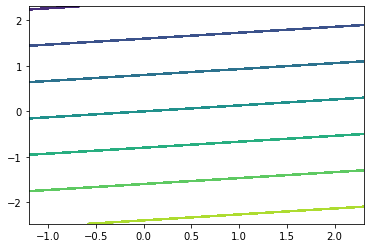

In [23]:
def f(x):
    return x[0]*0.13072319 -x[1]
    

X_test= X_test.reshape(-1,1)
y_test= y_test.reshape(-1,1)
xmesh,ymesh = np.meshgrid(X_train,y_train)

fmesh = f(np.array([xmesh, ymesh]))
plt.contour(xmesh, ymesh, fmesh)


In [24]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
ME =[]
MAE = []
MSE=[]
RMSE=[]
regressor = LinearRegression() 
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("Error Metrics: ")
    print("ME: "+ str(metrics.max_error(y_test,y_pred)) , end= "  ")
    print("MAE: "+ str(metrics.mean_absolute_error(y_test,y_pred)) , end= "  ")
    print("MSE: "+ str(metrics.mean_squared_error(y_test,y_pred)) , end= "  ")
    print("RMSE: "+ str(metrics.mean_squared_error(y_test,y_pred,squared=False)) , end= "  ")
    print()
    ME.append(metrics.max_error(y_test,y_pred))
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))
    MSE.append(metrics.mean_squared_error(y_test,y_pred))
    RMSE.append(metrics.mean_squared_error(y_test,y_pred,squared=False))
A= sum(ME)/len(ME)
B = sum(MAE)/len(MAE)
C = sum(MSE)/len(MSE)
D = sum(RMSE)/len(RMSE)

Error Metrics: 
ME: 8.512432927627279  MAE: 3.0623162187996473  MSE: 14.13229310446642  RMSE: 3.75929422956842  
Error Metrics: 
ME: 8.703821234959673  MAE: 3.307228801873784  MSE: 15.97795860383182  RMSE: 3.997243875951506  
Error Metrics: 
ME: 7.756092177498507  MAE: 2.9208643336179  MSE: 12.910154600559387  RMSE: 3.593070358420412  
Error Metrics: 
ME: 9.036439322956726  MAE: 2.884711177844027  MSE: 13.217063752588784  RMSE: 3.6355279881454337  
Error Metrics: 
ME: 8.805289186418188  MAE: 2.705323463870115  MSE: 11.518004136364816  RMSE: 3.39381851847809  
Error Metrics: 
ME: 8.96801290385999  MAE: 3.0582525979571975  MSE: 13.820026148352223  RMSE: 3.7175295759889018  
Error Metrics: 
ME: 8.960994734853502  MAE: 2.9603764604279834  MSE: 14.149430628488899  RMSE: 3.7615728928852223  
Error Metrics: 
ME: 8.743549049893016  MAE: 3.2648495900857415  MSE: 15.823951331691164  RMSE: 3.977933047663216  
Error Metrics: 
ME: 7.676154806491885  MAE: 2.4568782692520426  MSE: 9.409791228938982  

In [25]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
ME =[]
MAE = []
MSE=[]
RMSE=[]
regressor = LinearRegression() 
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("Error Metrics: ")
    print("ME: "+ str(metrics.max_error(y_test,y_pred)) , end= "  ")
    print("MAE: "+ str(metrics.mean_absolute_error(y_test,y_pred)) , end= "  ")
    print("MSE: "+ str(metrics.mean_squared_error(y_test,y_pred)) , end= "  ")
    print("RMSE: "+ str(metrics.mean_squared_error(y_test,y_pred,squared=False)) , end= "  ")
    print()
    ME.append(metrics.max_error(y_test,y_pred))
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))
    MSE.append(metrics.mean_squared_error(y_test,y_pred))
    RMSE.append(metrics.mean_squared_error(y_test,y_pred,squared=False))
A= sum(ME)/len(ME)
B = sum(MAE)/len(MAE)
C = sum(MSE)/len(MSE)
D = sum(RMSE)/len(RMSE)

Error Metrics: 
ME: 8.794359443314635  MAE: 3.233756495158825  MSE: 16.437290503442277  RMSE: 4.054292848752082  
Error Metrics: 
ME: 9.195147679324894  MAE: 3.012738343214229  MSE: 12.941909683277254  RMSE: 3.597486578609746  
Error Metrics: 
ME: 7.729274097580326  MAE: 2.707229734366343  MSE: 11.253343219284293  RMSE: 3.3546003069343886  
Error Metrics: 
ME: 8.438015955601804  MAE: 2.7882822481855656  MSE: 12.973648616447258  RMSE: 3.6018951423448264  
Error Metrics: 
ME: 8.920814345741848  MAE: 3.215450324615085  MSE: 14.944211846412678  RMSE: 3.8657744174243636  
